In [543]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [544]:
# Import make_regression method to generate artificial data samples 
from sklearn.datasets import make_regression

In [545]:
n_samples = 100 # Number of samples
n_features = 6 # Number of features
n_informative = 3 # Number of informative features i.e. actual features which influence the output

In [546]:
X, y,coef = make_regression(n_samples=n_samples, n_features=n_features, n_informative=n_informative,
                       random_state=None, shuffle=False,noise=20,coef=True)

In [547]:
df1 = pd.DataFrame(data=X,columns=['X'+str(i) for i in range(1,n_features+1)])
df2=pd.DataFrame(data=y,columns=['y'])
df=pd.concat([df1,df2],axis=1)
df.head(10)

,X1,X2,X3,X4,X5,X6,y
0,0.126157,1.537836,0.806673,-1.491675,0.299527,-1.474775,163.192326
1,-1.069024,0.054889,1.039015,-1.735270,1.821929,-1.468514,27.475965
2,-0.768465,0.987083,1.031437,0.188459,0.777789,0.479504,119.033181
3,-0.656240,1.082382,-1.189696,0.407922,-0.365730,0.229083,-40.529855
4,-0.014315,-0.393556,0.957417,-0.281082,1.336032,-1.126818,51.106814
5,-0.573993,-0.325107,1.364623,-0.250283,-0.188160,-1.172770,79.695119
6,0.157546,-1.190279,-1.062111,0.967536,-0.412225,1.300293,-152.172329
7,0.401044,-0.327829,1.166431,1.737604,-1.131857,1.081729,83.956168
8,1.357468,1.440760,-0.421540,-0.379527,0.317447,0.841242,118.143163
9,-1.690400,-0.298059,1.984504,-0.578445,-0.115120,-1.034285,32.072988


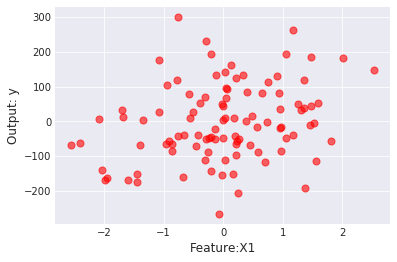

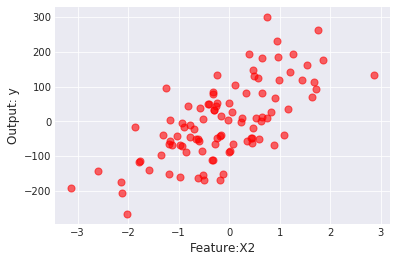

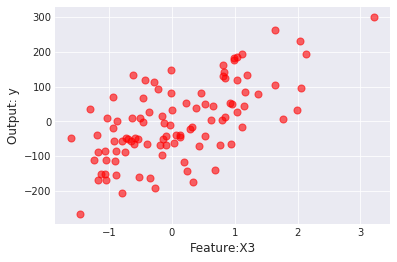

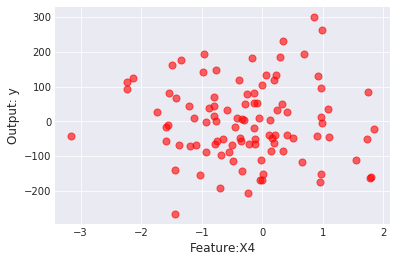

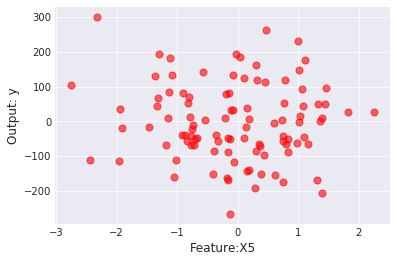

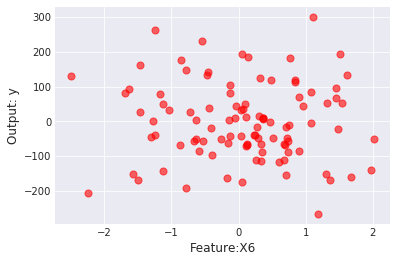

In [548]:
with plt.style.context(('seaborn-dark')):
    for i,col in enumerate(df.columns[:-1]):
        plt.figure(figsize=(6,4))
        plt.grid(True)
        plt.xlabel('Feature:'+col,fontsize=12)
        plt.ylabel('Output: y',fontsize=12)
        plt.scatter(df[col],df['y'],c='red',s=50,alpha=0.6)

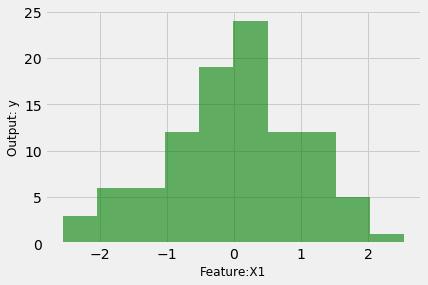

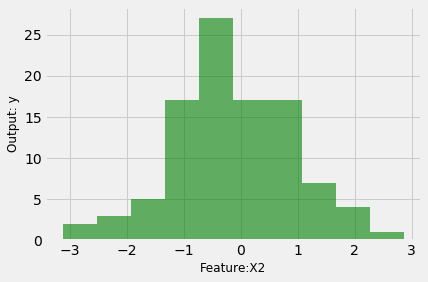

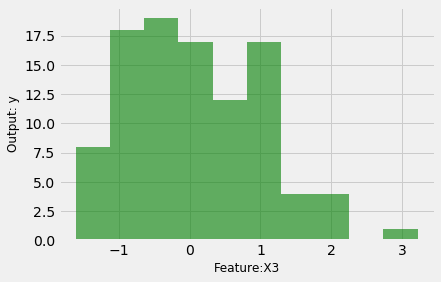

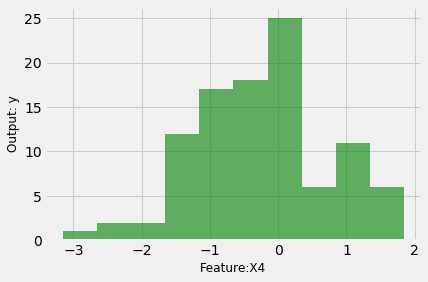

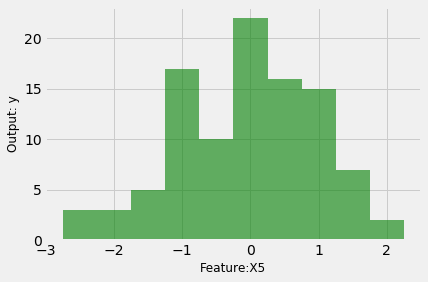

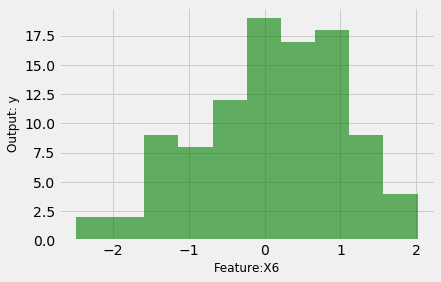

In [549]:
with plt.style.context(('fivethirtyeight')):
    for i,col in enumerate(df.columns[:-1]):
        plt.figure(figsize=(6,4))
        plt.grid(True)
        plt.xlabel('Feature:'+col,fontsize=12)
        plt.ylabel('Output: y',fontsize=12)
        plt.hist(df[col],alpha=0.6,facecolor='g')

In [550]:
from sklearn import tree

In [551]:
tree_model = tree.DecisionTreeRegressor(max_depth=5,random_state=None)
tree_model.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Relative importance of the features:  [ 0.06896493  0.35741588  0.54578154  0.0230699   0.          0.00476775]


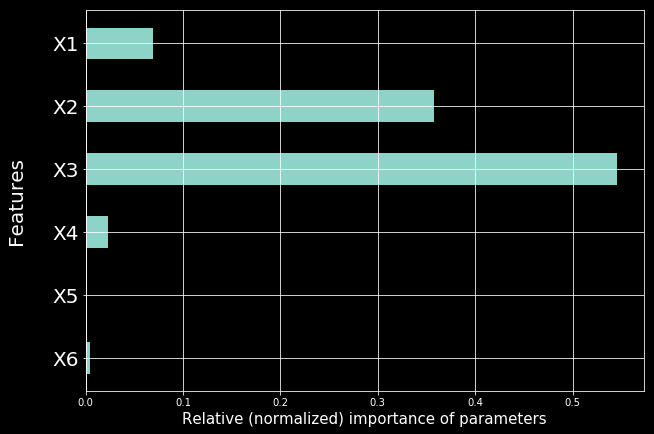

In [566]:
print("Relative importance of the features: ",tree_model.feature_importances_)
with plt.style.context('dark_background'):
    plt.figure(figsize=(10,7))
    plt.grid(True)
    plt.yticks(range(n_features+1,1,-1),df.columns[:-1],fontsize=20)
    plt.xlabel("Relative (normalized) importance of parameters",fontsize=15)
    plt.ylabel("Features\n",fontsize=20)
    plt.barh(range(n_features+1,1,-1),width=tree_model.feature_importances_,height=0.5)

In [553]:
print("Regression coefficient:",tree_model.score(X,y))

Regression coefficient: 0.95695111153


In [554]:
from sklearn.ensemble import RandomForestRegressor

In [555]:
model = RandomForestRegressor(max_depth=5, random_state=None,max_features='auto',max_leaf_nodes=5,n_estimators=100)
model.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=5,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Relative importance of the features:  [ 0.03456204  0.46959355  0.49500136  0.          0.          0.00084305]


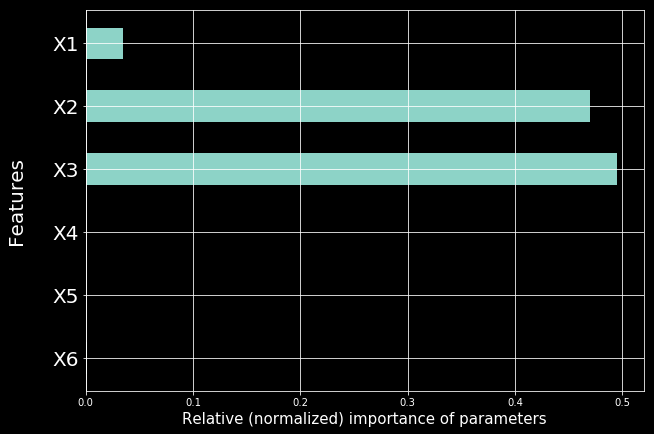

In [565]:
print("Relative importance of the features: ",model.feature_importances_)
with plt.style.context('dark_background'):
    plt.figure(figsize=(10,7))
    plt.grid(True)
    plt.yticks(range(n_features+1,1,-1),df.columns[:-1],fontsize=20)
    plt.xlabel("Relative (normalized) importance of parameters",fontsize=15)
    plt.ylabel("Features\n",fontsize=20)
    plt.barh(range(n_features+1,1,-1),width=model.feature_importances_,height=0.5)

In [557]:
print("Regression coefficient:",model.score(X,y))

Regression coefficient: 0.811794737752


In [558]:
import statsmodels.api as sm

In [559]:
Xs=sm.add_constant(X)
stat_model = sm.OLS(y,Xs)
stat_result = stat_model.fit()

In [560]:
print(stat_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     521.4
Date:                Thu, 04 Jan 2018   Prob (F-statistic):           2.79e-69
Time:                        23:56:18   Log-Likelihood:                -434.92
No. Observations:                 100   AIC:                             883.8
Df Residuals:                      93   BIC:                             902.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9153      2.056      0.445      0.6

In [561]:
rf_coef=np.array(coef)
stat_coef=np.array(stat_result.params[1:])

In [562]:
df_coef = pd.DataFrame(data=[rf_coef,stat_coef],columns=df.columns[:-1],index=['True Regressors', 'OLS method estimation'])
df_coef

,X1,X2,X3,X4,X5,X6
True Regressors,38.474632,71.735567,72.595476,0.000000,0.000000,0.000000
OLS method estimation,38.270216,69.670541,75.166745,-0.388141,-1.303634,-0.227058


In [563]:
df_importance = pd.DataFrame(data=[model.feature_importances_,stat_result.tvalues[1:]/sum(stat_result.tvalues[1:])],
                             columns=df.columns[:-1],
                             index=['RF Regressor relative importance', 'OLS method normalized t-statistic'])
df_importance

,X1,X2,X3,X4,X5,X6
RF Regressor relative importance,0.034562,0.469594,0.495001,0.00000,0.000000,0.000843
OLS method normalized t-statistic,0.217370,0.398305,0.394407,-0.00202,-0.006902,-0.001160
